In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
df1 = pd.read_csv('raw_data/XRD_protein_properties.csv', encoding = 'utf8')
df1.head()

Unnamed: 0 Entry ID Experimental Method  Matthews Coefficient  \
0           0     5VYC   X-RAY DIFFRACTION                  4.05   
1           1     5VYC   X-RAY DIFFRACTION                  4.05   
2           2     5VYC   X-RAY DIFFRACTION                  4.05   
3           3     5VYC   X-RAY DIFFRACTION                  4.05   
4           4     5VYC   X-RAY DIFFRACTION                  4.05   

   Percent Solvent Content         Crystallization Method   pH  \
0                    69.61  VAPOR DIFFUSION, SITTING DROP  8.1   
1                    69.61  VAPOR DIFFUSION, SITTING DROP  8.1   
2                    69.61  VAPOR DIFFUSION, SITTING DROP  8.1   
3                    69.61  VAPOR DIFFUSION, SITTING DROP  8.1   
4                    69.61  VAPOR DIFFUSION, SITTING DROP  8.1   

                            Crystal Growth Procedure  Temp (K)  \
0  50 mM HEPES-NaOH, 50 mM NH4 acetate, 50 mM NH4...    298.15   
1  50 mM HEPES-NaOH, 50 mM NH4 acetate, 50 mM NH4...    298.15   
2  50 mM HEPES-NaOH, 50 mM NH4 acetate, 50 mM NH4...    298.15   
3  50 mM HEPES-NaOH, 50 mM NH4 acetate, 50 mM NH4...    298.15   
4  50 mM HEPES-NaOH, 50 mM NH4 acetate, 50 mM NH4...    298.15   

                            DOI PDB ID  Molecular Weight per Deposited Model  \
0  10.1016/j.celrep.2017.06.025   5VYC                               7655.38   
1  10.1016/j.celrep.2017.06.025   5VYC                               7655.38   
2  10.1016/j.celrep.2017.06.025   5VYC                               7655.38   
3  10.1016/j.celrep.2017.06.025   5VYC                               7655.38   
4  10.1016/j.celrep.2017.06.025   5VYC                               7655.38   

   Resolution (Å)  High Resolution Limit  \
0             6.0                    6.0   
1             6.0                    6.0   
2             6.0                    6.0   
3             6.0                    6.0   
4             6.0                    6.0   

                                     Structure Title  \
0  Crystal structure of the human 40S ribosomal s...   
1  Crystal structure of the human 40S ribosomal s...   
2  Crystal structure of the human 40S ribosomal s...   
3  Crystal structure of the human 40S ribosomal s...   
4  Crystal structure of the human 40S ribosomal s...   

                                            Sequence Source Organism  \
0  MPGVTVKDVNQQEFVRALAAFLKKSGKLKVPEWVDTVKLAKHKELA...    Homo sapiens   
1  MAFKDTGKTPVEPEVAIHRIRITLTSRNVKSLEKVCADLIRGAKEK...    Homo sapiens   
2  MQNDAGEFVDLYVPRKCSASNRIIGAKDHASIQMNVAEVDKVTGRF...    Homo sapiens   
3  MGKCRGLRTARKLRSHRRDQKWHDKQYKKAHLGTALKANPFGGASH...    Homo sapiens   
4  MTKKRRNNGRAKKGRGHVQPIRCTNCARCVPKDKAIKKFVIRNIVE...    Homo sapiens   

  Gene Name         Macromolecule Name  Entity ID  Sequence Length  \
0     RPS19  40S ribosomal protein S19        1.0              145   
1     RPS20  40S ribosomal protein S20        2.0              119   
2     RPS21  40S ribosomal protein S21        3.0               83   
3     RPS23  40S ribosomal protein S23        4.0              143   
4     RPS26  40S ribosomal protein S26        5.0              115   

   Hydrophobic Residues  Hydrophilic Residues  Aromatic Residues  Hydro Ratio  \
0                    72                    73                 10     0.986301   
1                    54                    65                  3     0.830769   
2                    40                    43                  6     0.930233   
3                    71                    72                  8     0.986111   
4                    54                    61                  6     0.885246   

   Isoelectric Point  Alipathic Index  Charge at pH 7  Cardin-Weintraub Motif  
0          10.310703        74.000000               4                       1  
1           9.948584        91.680672               3                       1  
2           8.683779        78.795181               1                       0  
3          10.501013        83.846154               5   

In [3]:
df1.describe()

Unnamed: 0  Matthews Coefficient  Percent Solvent Content  \
count  36288.000000          36288.000000             36288.000000   
mean   18143.500000              2.789012                53.302758   
std    10475.587621              0.759495                10.212594   
min        0.000000              0.410000                 0.360000   
25%     9071.750000              2.300000                46.420000   
50%    18143.500000              2.610000                52.945000   
75%    27215.250000              3.060000                59.870000   
max    36287.000000             13.890000                90.010000   

                 pH      Temp (K)  Molecular Weight per Deposited Model  \
count  36288.000000  36288.000000                          36288.000000   
mean       6.812614    290.673244                            114.743761   
std        1.212713      6.924123                            409.102050   
min        1.000000    100.000000                              0.420000   
25%        6.000000    291.000000                             35.430000   
50%        7.000000    293.000000                             60.185000   
75%        7.500000    294.000000                            106.180000   
max       11.100000    323.000000                           7655.380000   

       Resolution (Å)  High Resolution Limit     Entity ID  Sequence Length  \
count    36288.000000           36288.000000  36288.000000     36288.000000   
mean         2.363082               2.363082      1.741127       216.881559   
std          0.676515               0.676515      2.808442       178.519162   
min          0.750000               0.750000      1.000000         2.000000   
25%          1.900000               1.900000      1.000000       100.000000   
50%          2.300000               2.300000      1.000000       207.000000   
75%          2.750000               2.750000      2.000000       291.000000   
max          9.700000               9.700000     89.000000      4128.000000   

       Hydrophobic Residues  Hydrophilic Residues  Aromatic Residues  \
count          36288.000000          36288.000000       36288.000000   
mean             101.684110            114.952960          19.735891   
std               86.831991             92.344157          17.255323   
min                0.000000              1.000000           0.000000   
25%               44.000000             54.000000           7.000000   
50%               90.000000            112.000000          18.000000   
75%              138.000000            152.250000          27.000000   
max             1911.000000           2036.000000         352.000000   

        Hydro Ratio  Isoelectric Point  Alipathic Index  Charge at pH 7  \
count  36288.000000       36288.000000     36288.000000    36288.000000   
mean       0.945456           6.899265        75.354511        6.154707   
std        0.658711           1.766868        24.266011        6.115765   
min        0.000000           4.050028         0.000000        0.000000   
25%        0.747368           5.504936        66.666667        1.000000   
50%        0.865285           6.413990        77.876448        4.000000   
75%        1.000000           8.469744        88.473727        9.000000   
max       26.000000          11.999968       260.000000       86.000000   

       Cardin-Weintraub Motif  
count            36288.000000  
mean                 0.422040  
std                  0.493892  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  1.000000

In [4]:
df1.columns

Index(['Unnamed: 0', 'Entry ID', 'Experimental Method', 'Matthews Coefficient',
       'Percent Solvent Content', 'Crystallization Method', 'pH',
       'Crystal Growth Procedure', 'Temp (K)', 'DOI', 'PDB ID',
       'Molecular Weight per Deposited Model', 'Resolution (Å)',
       'High Resolution Limit', 'Structure Title', 'Sequence',
       'Source Organism', 'Gene Name', 'Macromolecule Name', 'Entity ID',
       'Sequence Length', 'Hydrophobic Residues', 'Hydrophilic Residues',
       'Aromatic Residues', 'Hydro Ratio', 'Isoelectric Point',
       'Alipathic Index', 'Charge at pH 7', 'Cardin-Weintraub Motif'],
      dtype='object')

Text(0.5, 1.0, 'Cardin-Weintraub Motif')

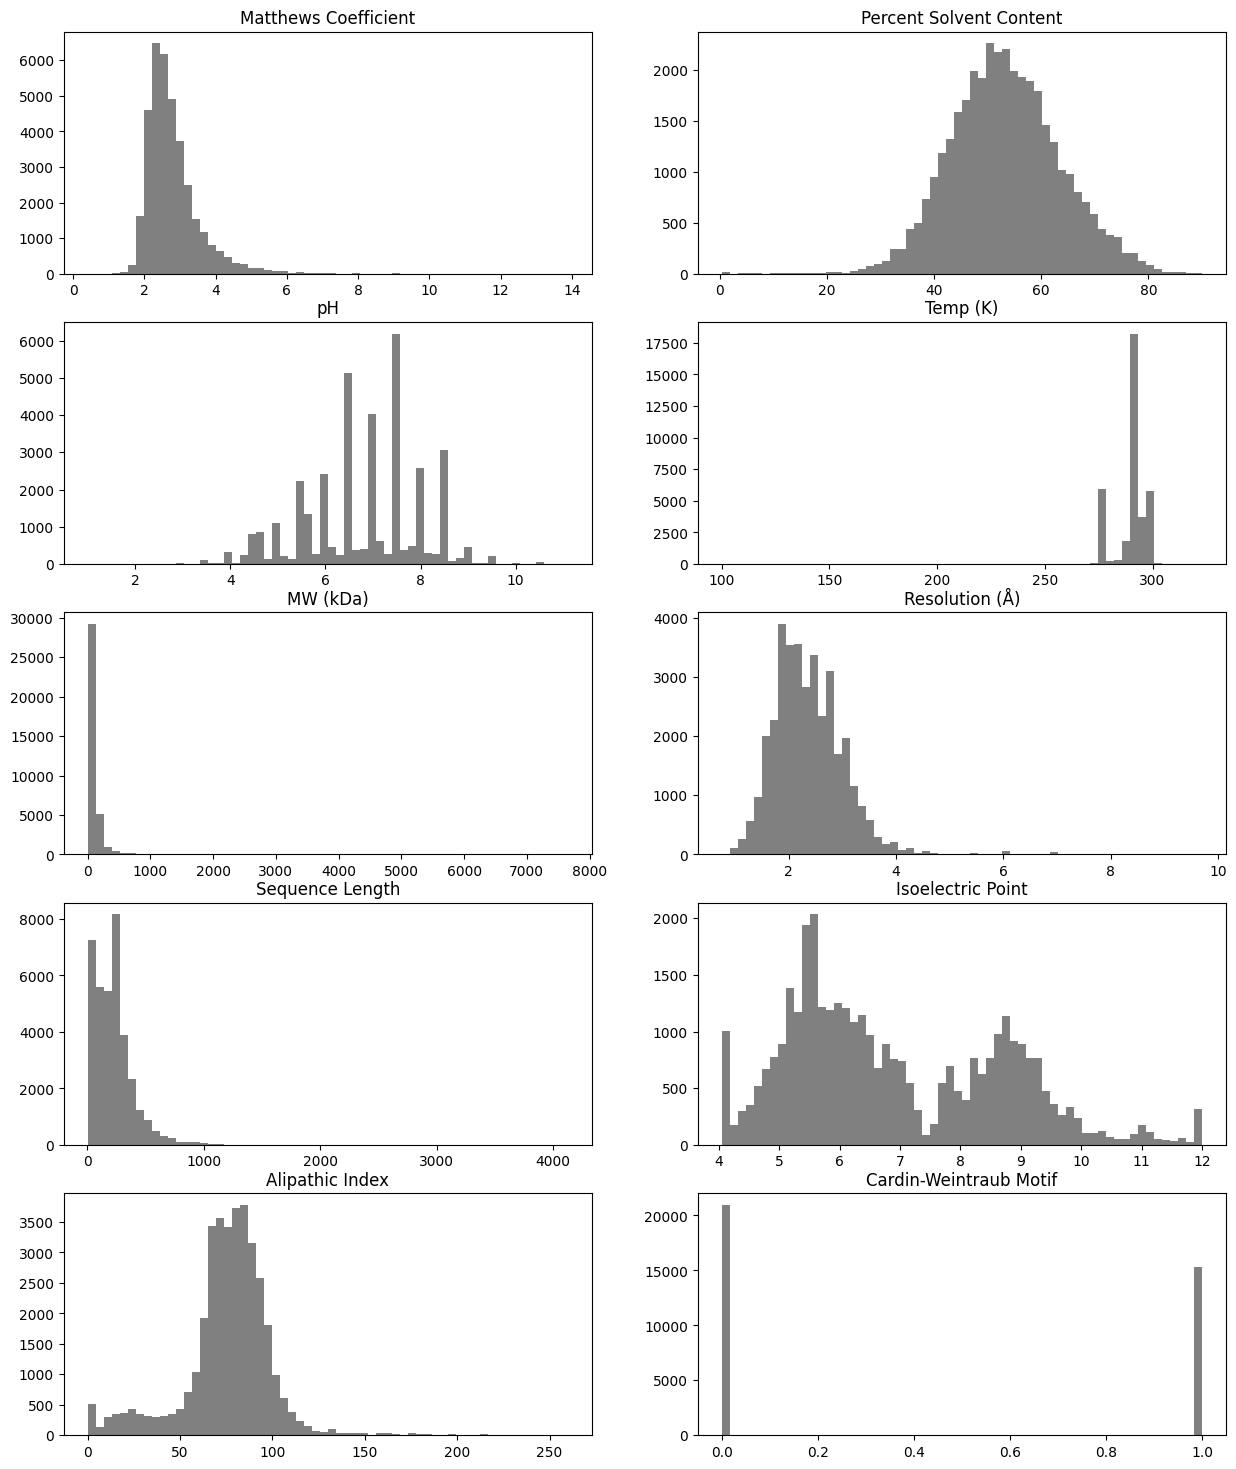

In [5]:
plt.figure(figsize=(15,22))

plt.subplot(6,2,1)
plt.hist(df1['Matthews Coefficient'], bins=60, color='grey')
plt.title('Matthews Coefficient')

plt.subplot(6,2,2)
plt.hist(df1['Percent Solvent Content'], bins=60, color='grey')
plt.title('Percent Solvent Content')

plt.subplot(6,2,3)
plt.hist(df1['pH'], bins=60, color='grey')
plt.title('pH')

plt.subplot(6,2,4)
plt.hist(df1['Temp (K)'], bins=60, color='grey')
plt.title('Temp (K)')

plt.subplot(6,2,5)
plt.hist(df1['Molecular Weight per Deposited Model'], bins=60, color='grey')
plt.title('MW (kDa)')

plt.subplot(6,2,6)
plt.hist(df1['Resolution (Å)'], bins=60, color='grey')
plt.title('Resolution (Å)')

plt.subplot(6,2,7)
plt.hist(df1['Sequence Length'], bins=60, color='grey')
plt.title('Sequence Length')

plt.subplot(6,2,8)
plt.hist(df1['Isoelectric Point'], bins=60, color='grey')
plt.title('Isoelectric Point')

plt.subplot(6,2,9)
plt.hist(df1['Alipathic Index'], bins=60, color='grey')
plt.title('Alipathic Index')

plt.subplot(6,2,10)
plt.hist(df1['Cardin-Weintraub Motif'], bins=60, color='grey')
plt.title('Cardin-Weintraub Motif')

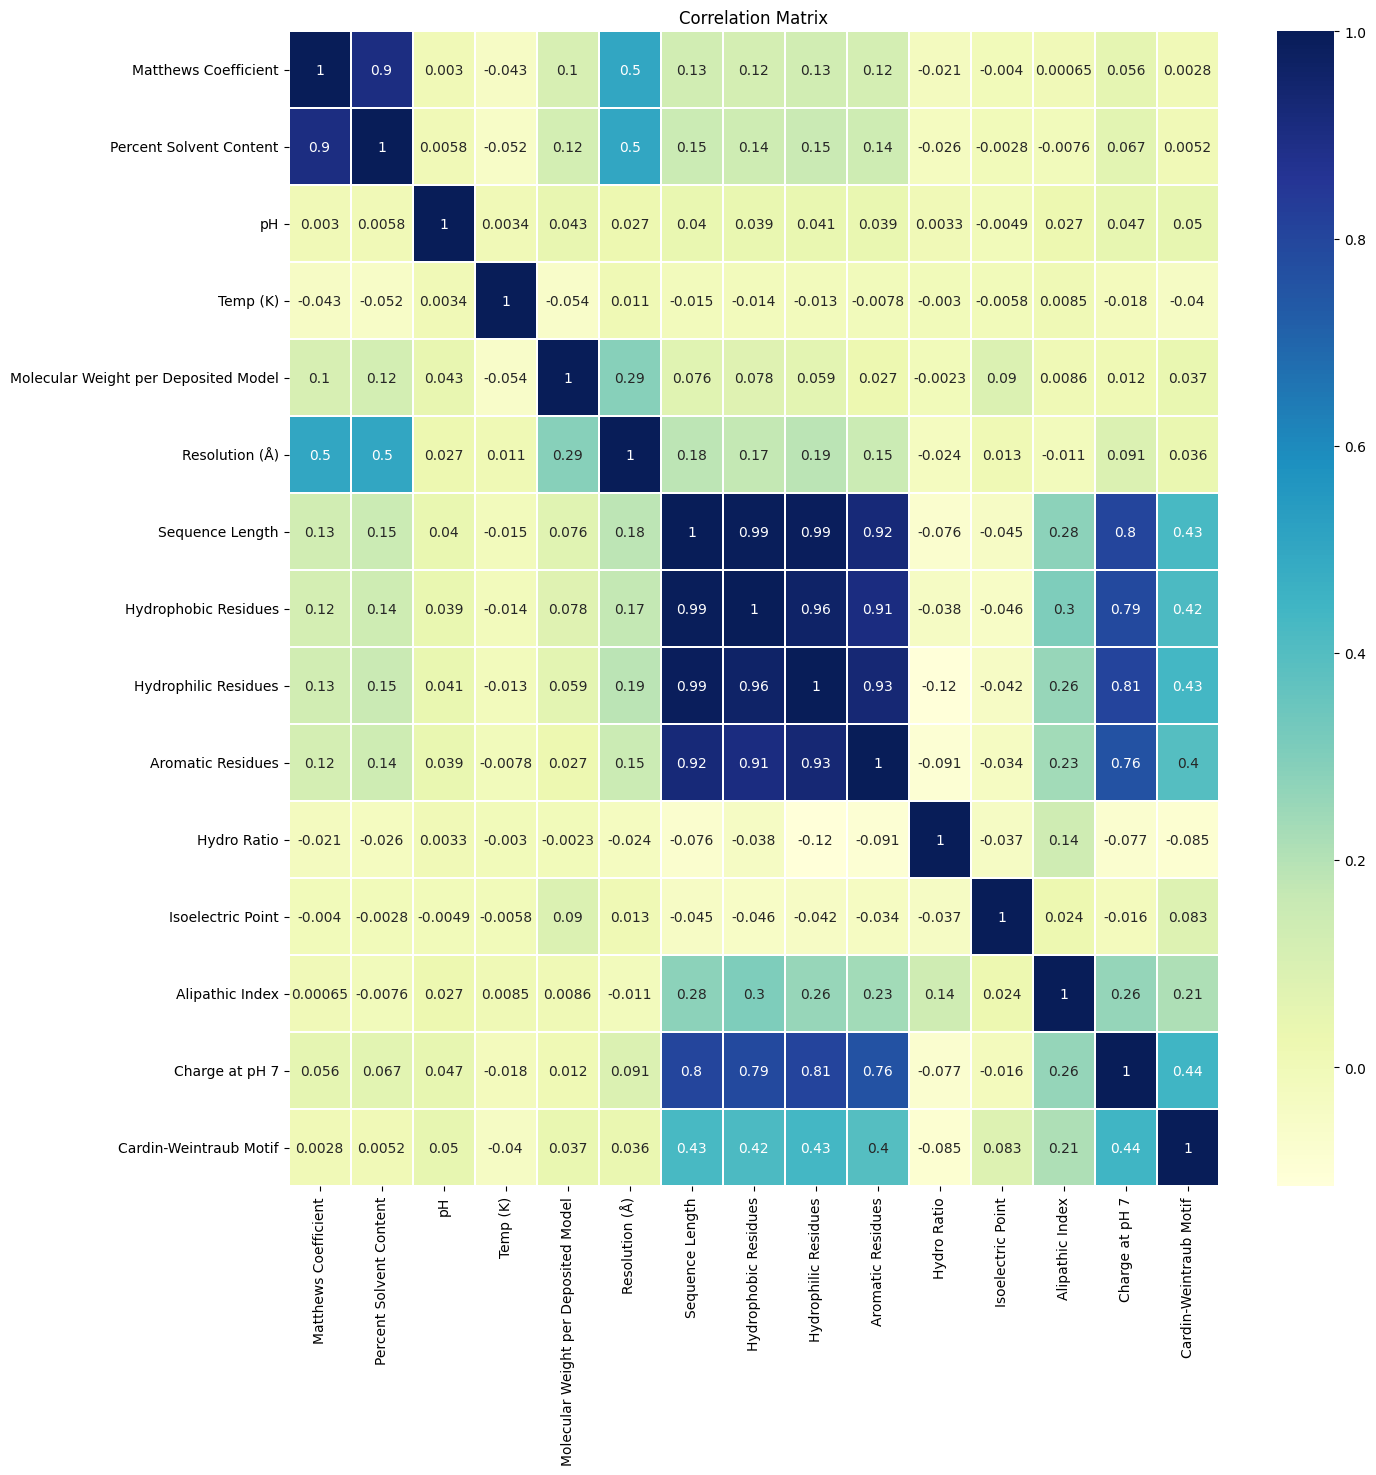

In [6]:
plt.figure(figsize=(15,15))

df1_subset1 = df1[['Matthews Coefficient', 'Percent Solvent Content', 'pH',
       'Temp (K)', 'Molecular Weight per Deposited Model', 'Resolution (Å)',
       'Sequence Length', 'Hydrophobic Residues', 'Hydrophilic Residues',
       'Aromatic Residues', 'Hydro Ratio', 'Isoelectric Point',
       'Alipathic Index', 'Charge at pH 7', 'Cardin-Weintraub Motif']]

sns.heatmap(df1_subset1.corr(numeric_only=True), linewidth=.1, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

In [7]:
#all dataset properties in pair plot
df1_subset1 = df1[['Matthews Coefficient', 'Percent Solvent Content', 'pH',
       'Temp (K)', 'Molecular Weight per Deposited Model', 'Resolution (Å)',
       'Sequence Length', 'Hydrophobic Residues', 'Hydrophilic Residues',
       'Aromatic Residues', 'Hydro Ratio', 'Isoelectric Point',
       'Alipathic Index', 'Charge at pH 7', 'Cardin-Weintraub Motif']]

plt.figure(figsize=(25,25))
graph = sns.pairplot(df1_subset1, plot_kws={"s": 3})
graph.fig.suptitle('Correlation Matrix', y=1.01)
plt.show()

<Figure size 2500x2500 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

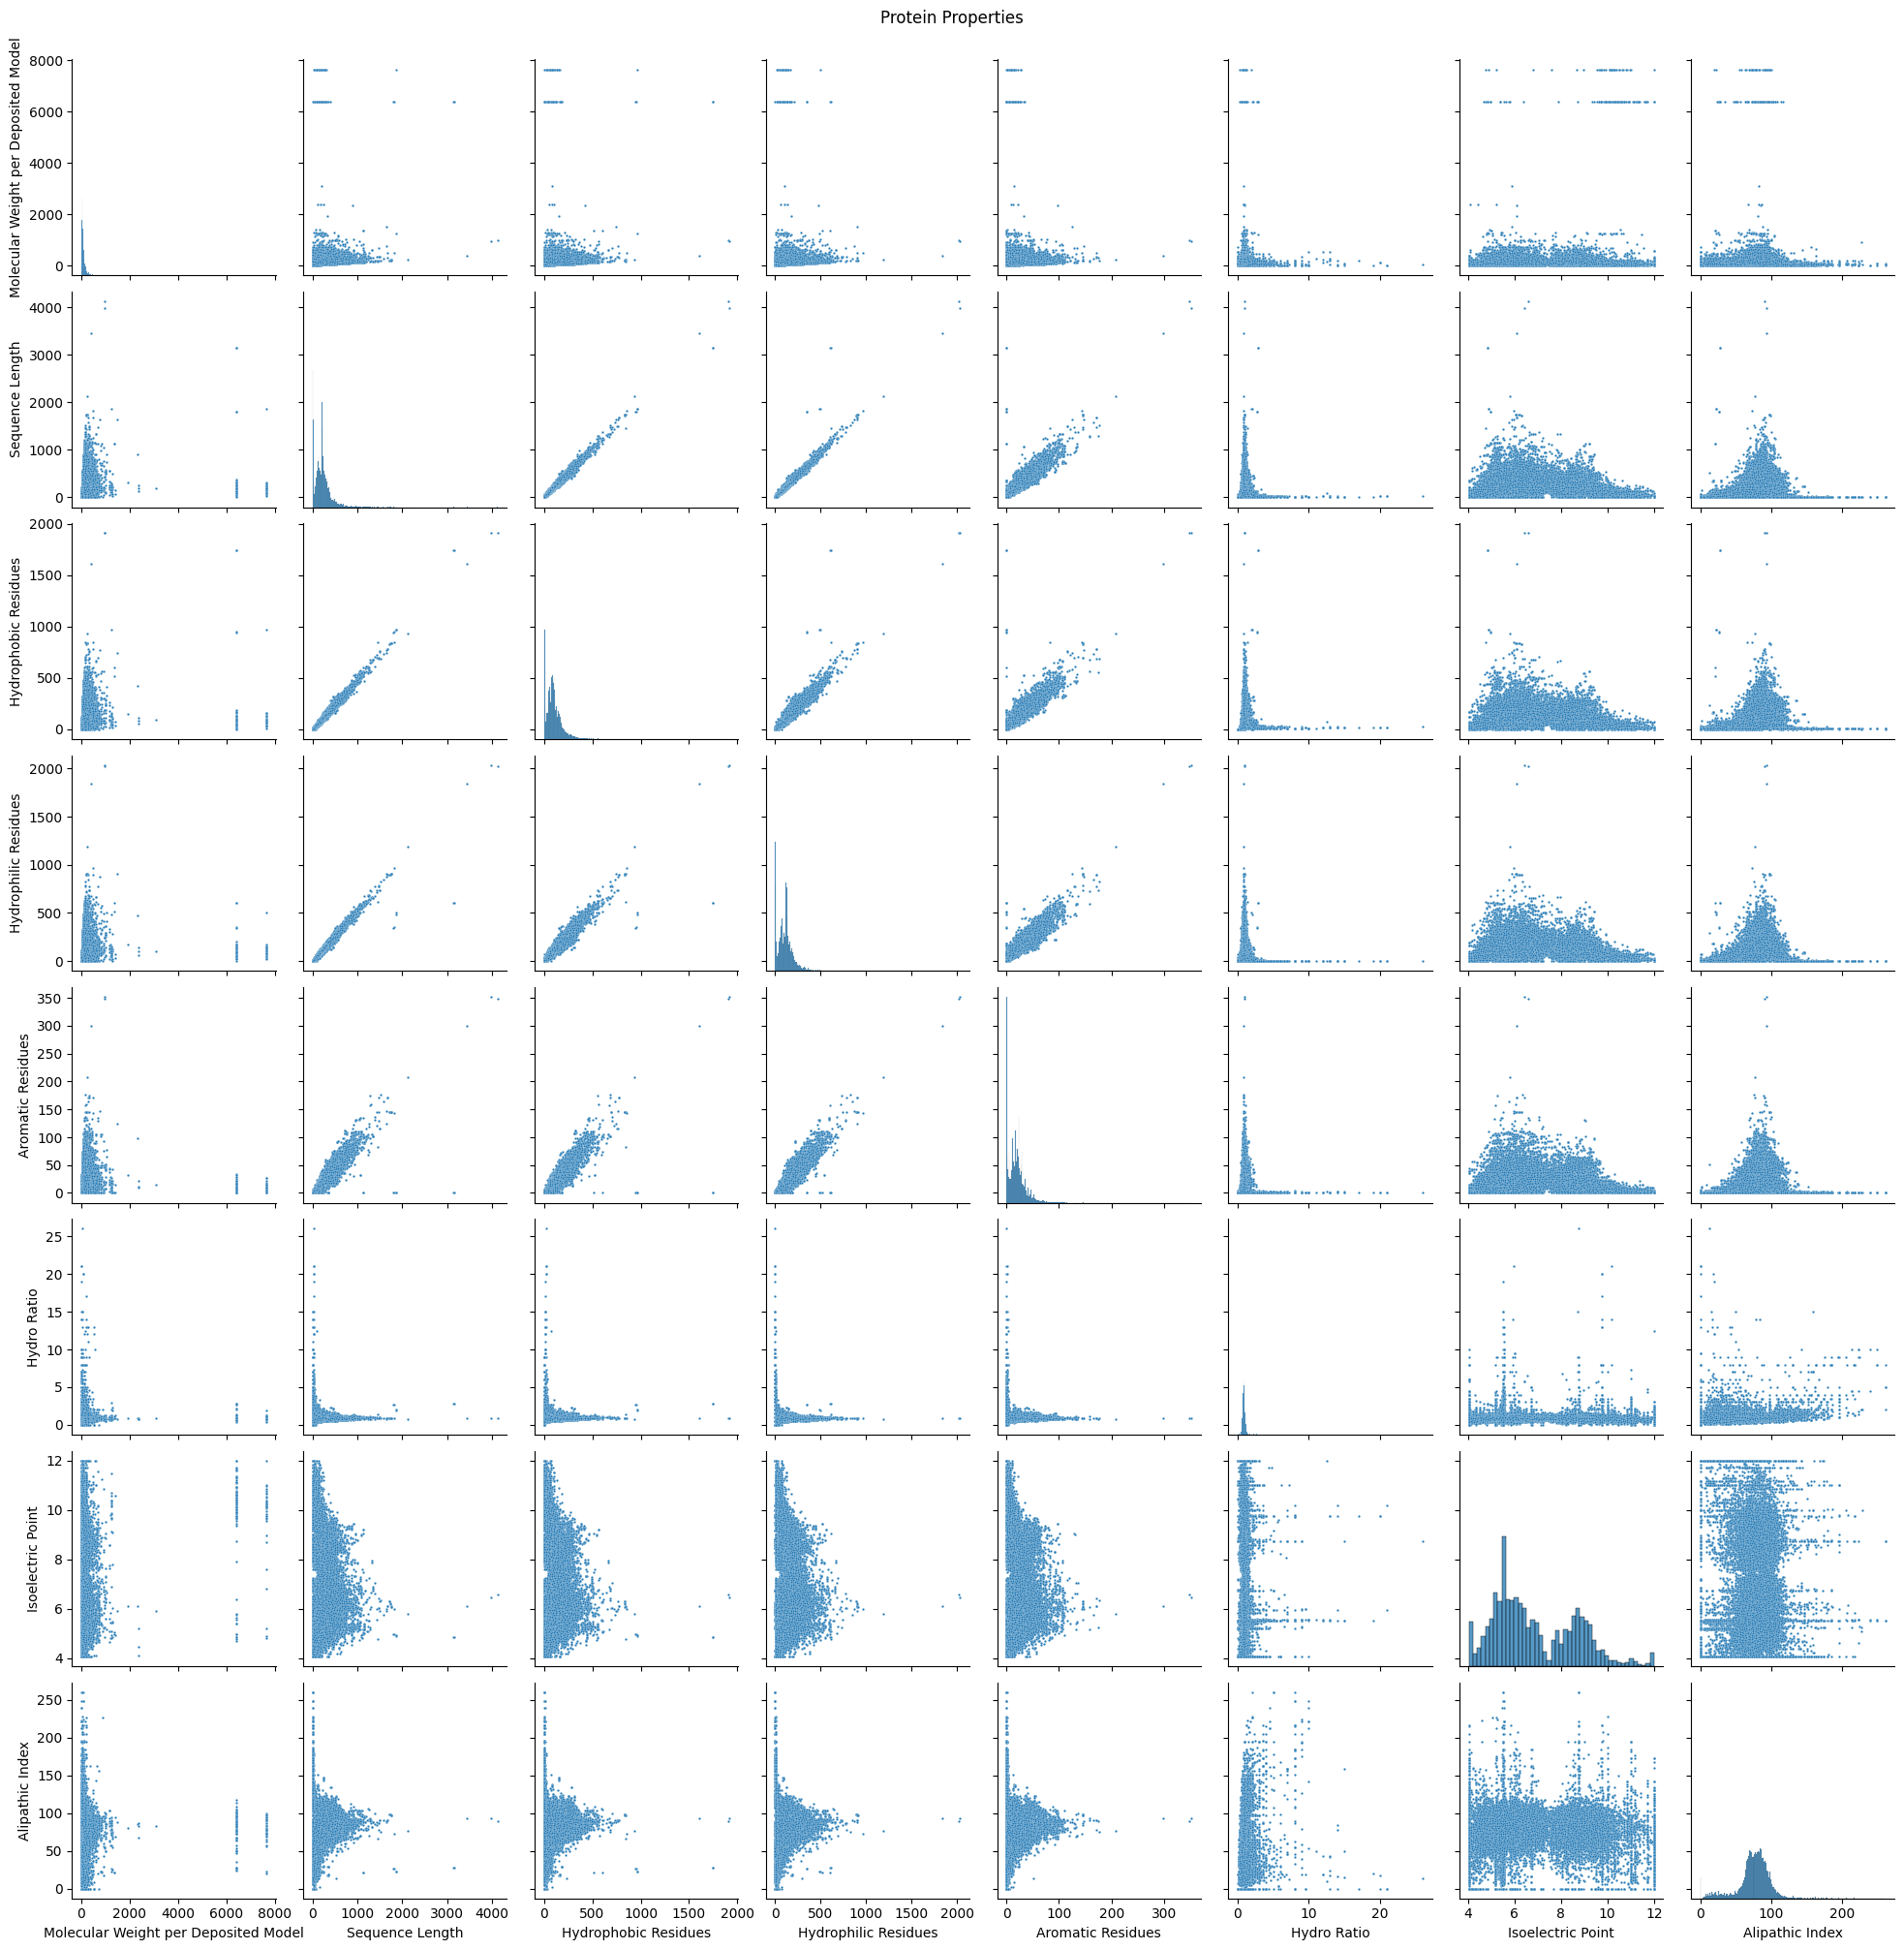

In [8]:
#general protein properties
df1_subset2 = df1[['Molecular Weight per Deposited Model',
       'Sequence Length', 'Hydrophobic Residues', 'Hydrophilic Residues',
       'Aromatic Residues', 'Hydro Ratio', 'Isoelectric Point',
       'Alipathic Index']]

plt.figure(figsize=(25,25))
graph = sns.pairplot(df1_subset2, plot_kws={"s": 3})
graph.fig.suptitle('Protein Properties', y=1.01)
plt.show()

<Figure size 2500x2500 with 0 Axes>

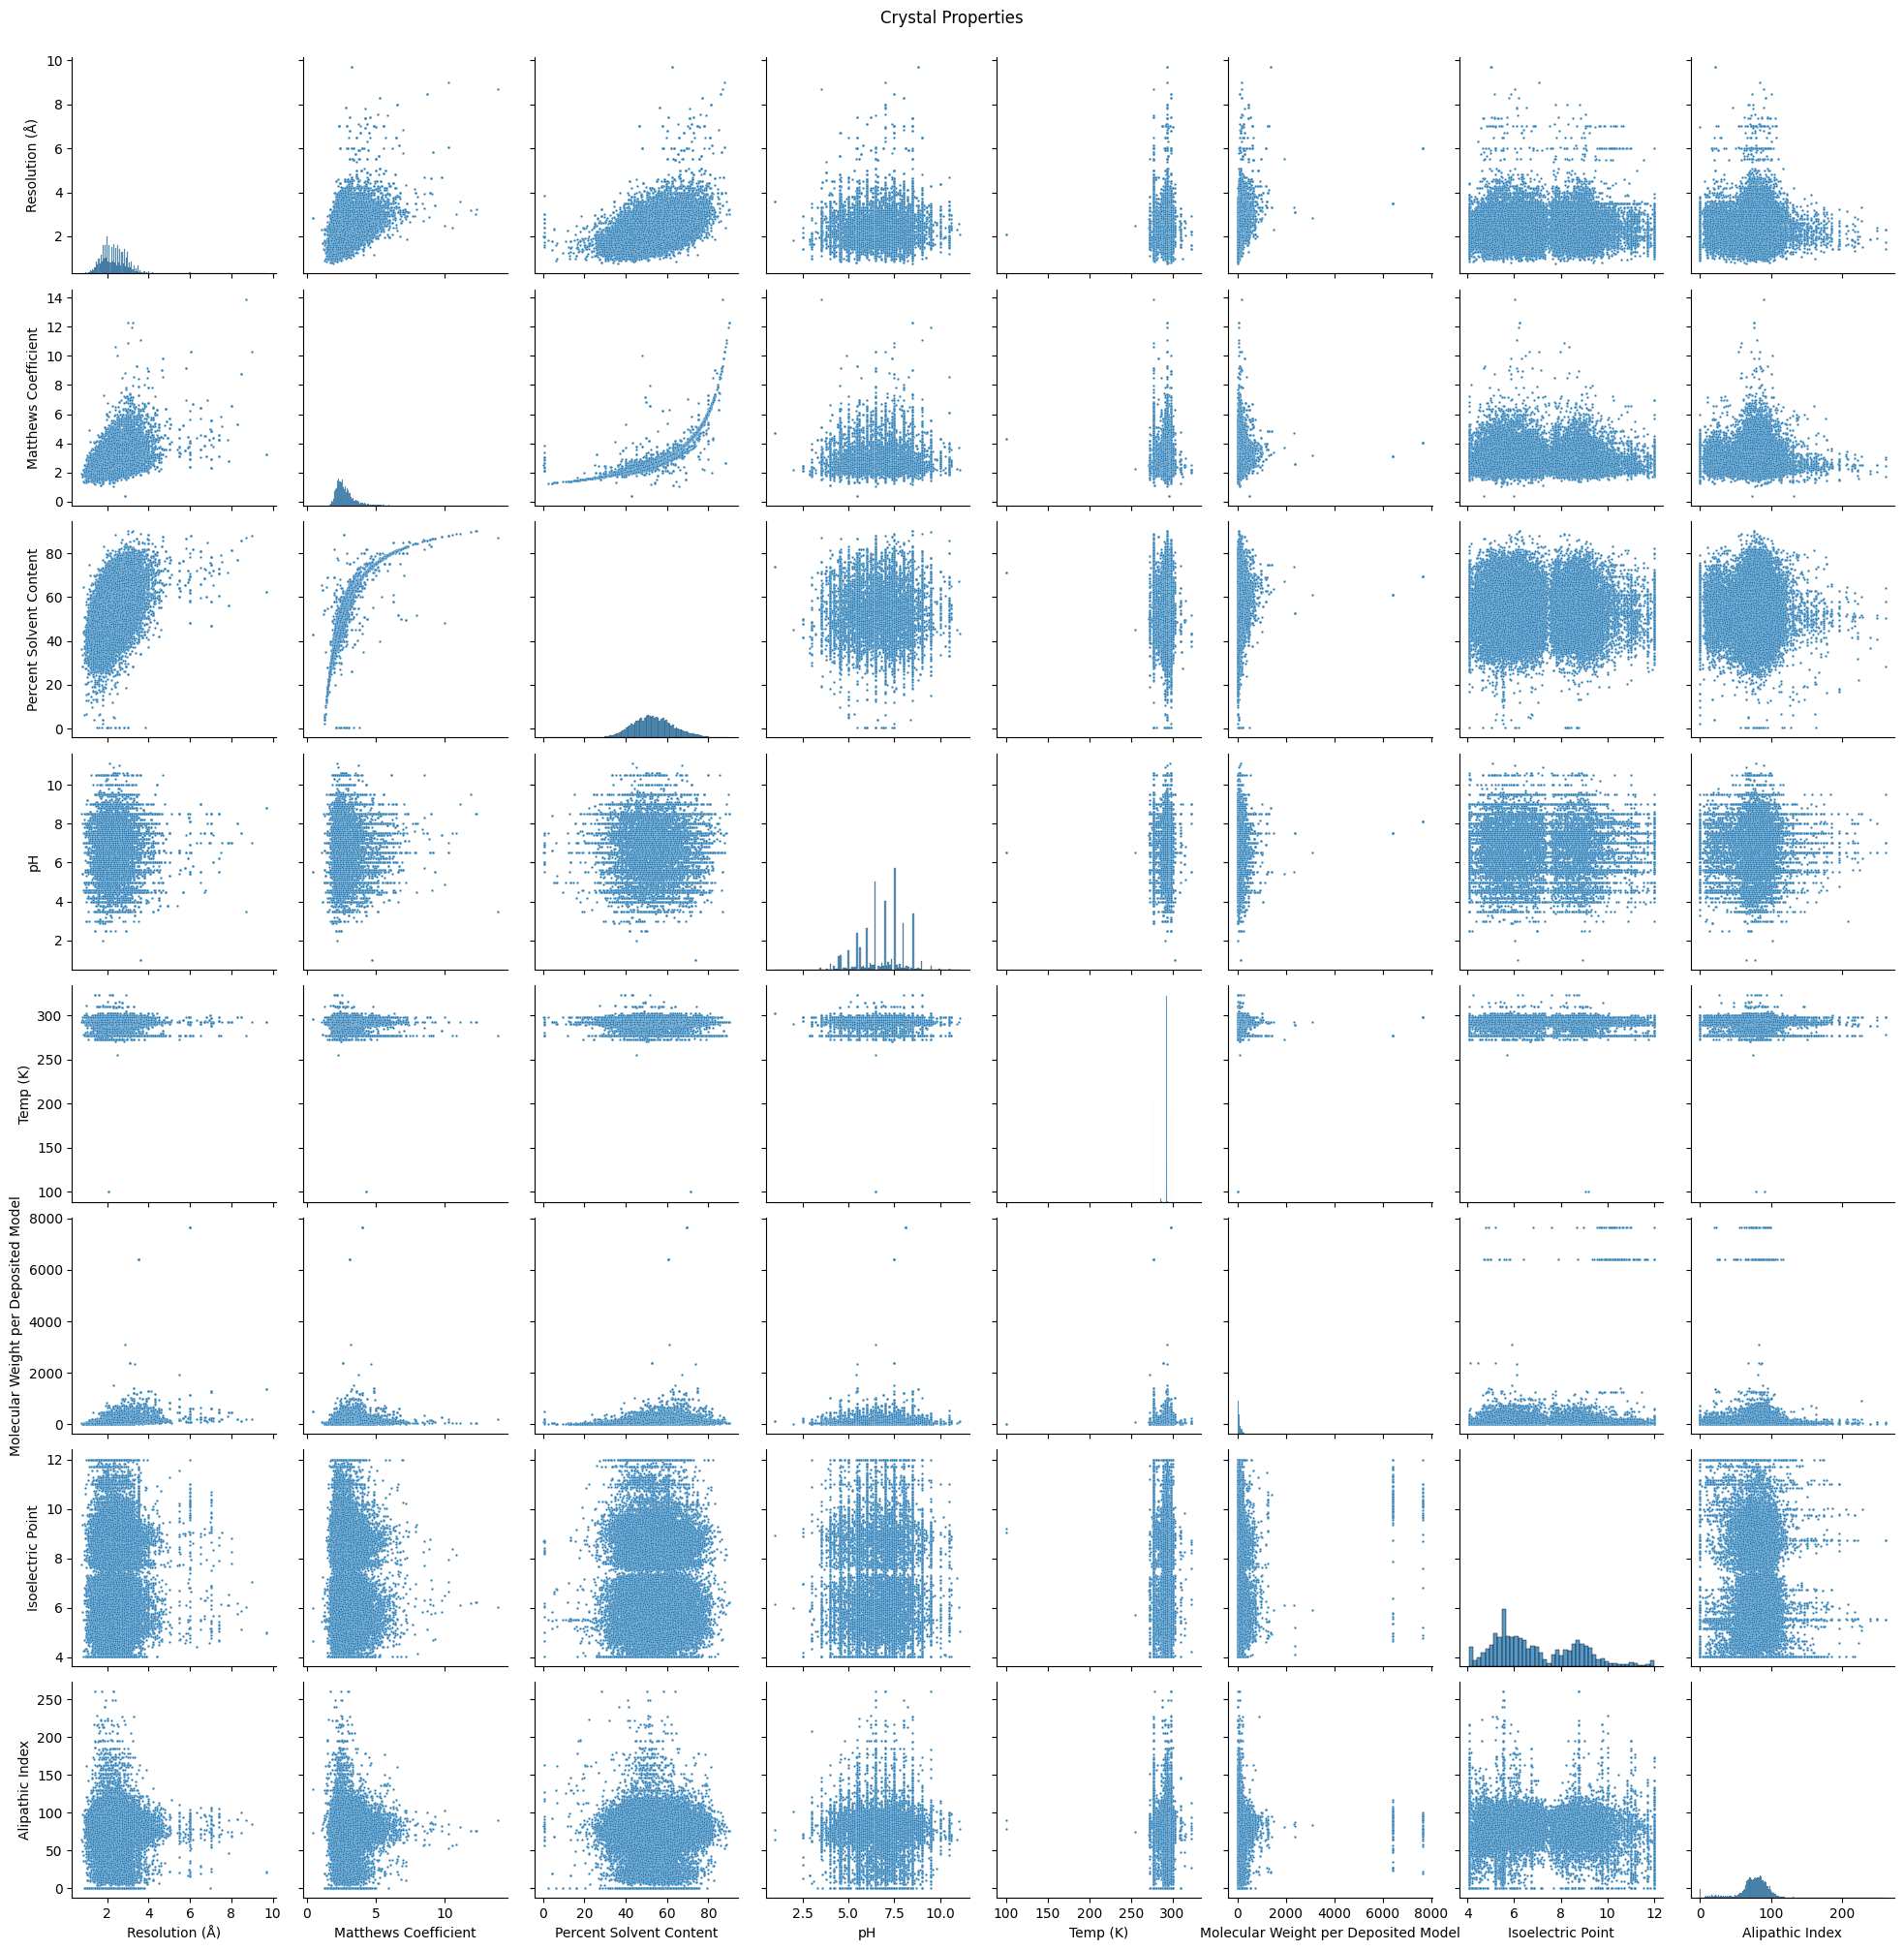

In [9]:
#general crystal properties
df1_subset3 = df1[['Resolution (Å)', 'Matthews Coefficient', 'Percent Solvent Content', 'pH',
       'Temp (K)', 'Molecular Weight per Deposited Model','Isoelectric Point', 'Alipathic Index']]

plt.figure(figsize=(25,25))
graph = sns.pairplot(df1_subset3, plot_kws={"s": 3})
graph.fig.suptitle('Crystal Properties', y=1.01)
plt.show()